# Reaction-Based Molecular Transforms

Reaction-based enumeration is a powerful technique in cheminformatics that allows generating virtual libraries of molecules by applying chemical reactions to a set of reactants or building blocks. RDKit provides functionality to perform such enumerations using the rdChemReactions module.

I will show how to generate molecules from reaction-based enumeration such as an amide-coupling reaction. 

### Reaction Transform (one reactant -> one product) : Ketone to Carboxylic Acid

Herein, a carboxylic acid and an amine react to form an amide bond as shown in the following scheme. So the reactants are a carboxylic acid and an amine, and the product is an amide.

<div>
<img src="data/amide_coupling.png" width="500"/>
</div>

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

First, starting with a single molecule transform, let's see how it works when converting a ketone to a carboxylic acid.

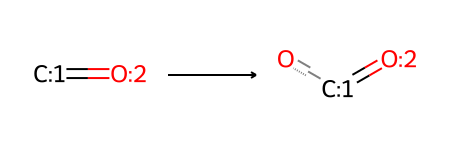

In [2]:
Ketone_to_CarboxylicAcid = "[Ch:1](=[O:2]) >> [C:1](=[O:2])O"

rxn = AllChem.ReactionFromSmarts(Ketone_to_CarboxylicAcid)
rxn

Reactant(s) are on the left side of the”>>” symbol and product(s) stay on the right side. 

Atom numbering needs to be specified to show which atom reacts in a particular way. 

For atom numbering, specify “: ​​1” ( and increment for the other atoms that you want to specify) after the element symbol and surround it in brackets ([]), such as [element symbol + modification information such as hydrogen and electric charge: number].

Now, let’s create three compounds to test this transformation.

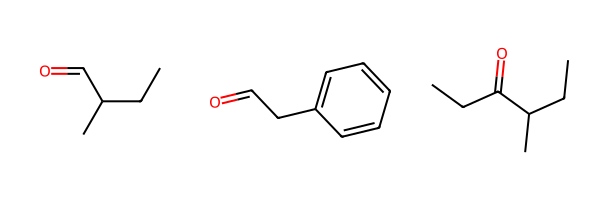

In [3]:
# Define the reactant building blocks (amines)
reactants = ["O=CC(CC)C", "O=CCc1ccccc1", "C(=O)(C(CC)C)CC"]
reactants = [Chem.MolFromSmiles(smi) for smi in reactants]

Chem.Draw.MolsToGridImage(reactants)

Let's label compounds on the left as cpd A, the middle as cpd B and the right as cpd C. 

We will run the transformation on them and see how the results are. Cpd A and B should run okay, but cpd C shouldn’t be converted to carboxylic acid. Below are the expected transforms for the compounds.

<div>
<img src="data/reaction_transform.png" width="500"/>
</div>

We will now run the ketone to carboxylic reaction on cpd A and visualize the resulting product(s). 

Since there is only one reactant, we just have to put the mol of cpd A (which is mol_s1) in the RunReactants function’s parameter.

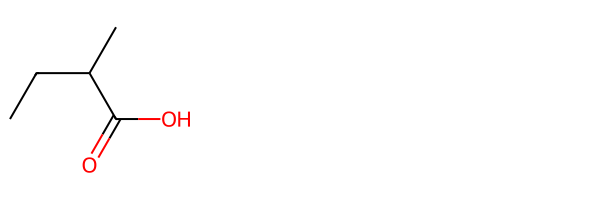

In [4]:
resulting_mols = []
products = rxn.RunReactants((reactants[0],))

for i in range(len(products)):
    current_mol = products[i][0]
    resulting_mols.append(current_mol)
 
Chem.Draw.MolsToGridImage(resulting_mols) 

The product is as expected. Now, let’s run the ketone to carboxylic acid reaction on cpd B. 

We just need to update reactants[0] to reactants[1] and run the jupyter notebook cell again.



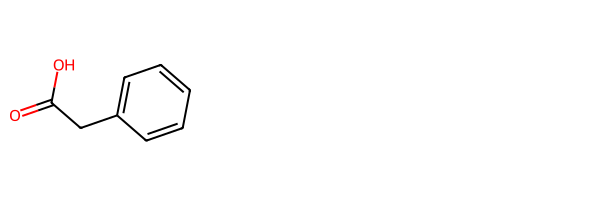

In [6]:
resulting_mols = []
products = rxn.RunReactants((reactants[1],))

for i in range(len(products)):
    current_mol = products[i][0]
    resulting_mols.append(current_mol)
 
Chem.Draw.MolsToGridImage(resulting_mols) 

This is the expected product for cpd B. Now, let’s try the same reaction for cpd C by updating reactants[1] to reactants[2]. 

We get an error because resulting_mols is empty and no product resulted from cpd C.

## Reaction Transform (Two reactants -> one product) : Amide-Coupling Reaction

Now, Let’s try the amide-coupling reaction where there are two reactants and one product.

We will write the reaction smart pattern (carboxylic acid + amine => amide product) and visualize it. 

Note that when there are two or more compounds on either side of the reaction, they are separated by a dot “.”



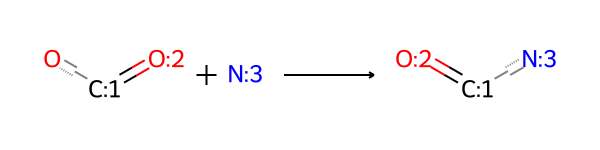

In [9]:
smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
amine_coupling_rxn = AllChem.ReactionFromSmarts(smarts)
amine_coupling_rxn

We will try the reaction with a simple carboxylic acid and amine. First, we will need the SMILEs and convert them to RDKit mols. We will also visualize the structures.

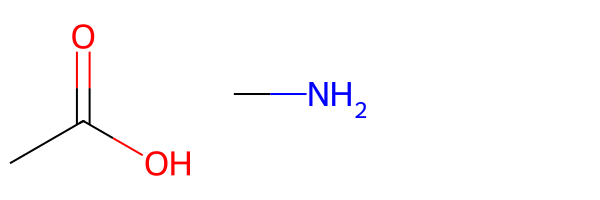

In [10]:
carboxylic_acid = "C(=O)(O)C"
amine           = "NC"
 
carboxylic_acid_mol = Chem.MolFromSmiles(carboxylic_acid)
amine_mol           = Chem.MolFromSmiles(amine)
 
Chem.Draw.MolsToGridImage([carboxylic_acid_mol, amine_mol])

Now, let’s run the reaction for these reactants and see if it runs okay.



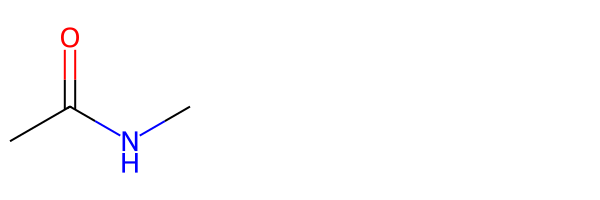

In [11]:
products = amine_coupling_rxn.RunReactants([carboxylic_acid_mol, amine_mol])

resulting_mol_list = []
for i in range(len(products)):
    resulting_mol_list.append(products[i][0])
 
Chem.Draw.MolsToGridImage(resulting_mol_list) 

This is the expected product, so the reaction transform went okay. Now, let’s write a function which will take in two SMILEs and return the product as SMILES.

In [12]:
def amide_coupling(smile1, smile2):
    
    mol1 = Chem.MolFromSmiles(smile1)
    mol2 = Chem.MolFromSmiles(smile2)
    
    smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
    rxn3 = AllChem.ReactionFromSmarts(smarts)
    
    products = rxn3.RunReactants([mol1, mol2])
    resulting_smile_list = []
    
    try:
        for i in range(len(products)):
            resulting_smile = Chem.MolToSmiles(products[i][0])
            resulting_smile_list.append(resulting_smile)
    except:
        pass
    return resulting_smile_list

We will now try running it with a few examples. Below is the scheme with the reactants and the expected products.

<div>
<img src="data/2_reactant_reaction_transform.png" width="500"/>
</div>

Let’s call the function for Reaction A, and then visualize the product(s). We need to provide two input SMILEs for the function which will return the product SMILE(s).

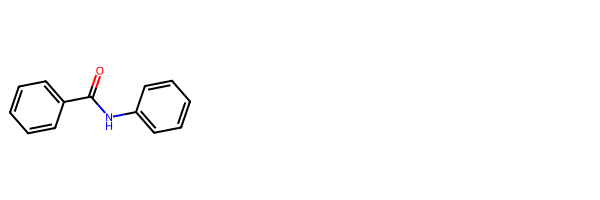

In [14]:
cpd1 = "C(=O)(c1ccccc1)O"
cpd2 = "c1(ccccc1)N"

resulting_smiles = amide_coupling(cpd1, cpd2)

Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles]) 

The result is the expected product for Reaction A, so it is good. Now, let’s try running it for Reaction B.

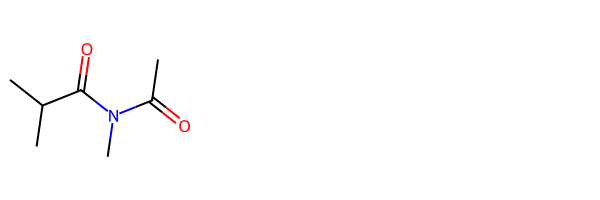

In [15]:
cpd1 = "C(=O)(C(C)C)O"
cpd2 = "C(=O)(NC)C"

resulting_smiles = amide_coupling(cpd1, cpd2)

Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles])

This is the expected product for Reaction B, so the function seems to work okay.

## Enumerate a small library of fragments

In [20]:
import pandas as pd

frag = pd.read_csv("data/fragment_library.csv")
print(frag.shape[0])
frag

20


,SMILES,Name,Type
0,N=C(N)NC[C@@H](N)C(=O)O,1576365,carboxylic_acid
1,CN(C)C[C@@H](N)C(=O)O,35024242,carboxylic_acid
2,Nc1nnn(CC(=O)O)n1,4294607,carboxylic_acid
3,COC(=O)[C@@H](O)CC(=O)O,14585673,carboxylic_acid
4,N=C(N)NC[C@H](N)C(=O)O,2384694,carboxylic_acid
5,N[C@H](CO)C(=O)O,895342,carboxylic_acid
6,NCC[C@H](N)C(=O)O,52986906,carboxylic_acid
7,C[C@@H](O)[C@H](N)C(=O)O,895103,carboxylic_acid
8,NC(=O)[C@H](N)CCC(=O)O,2560808,carboxylic_acid
9,NCC(=O)NCCC(=O)O,1637970,carboxylic_acid
